# Back propagation

In [1]:
import numpy as np

# showing imported graphics
from IPython.display import display, Image

# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys # system library
sys.path.append('./lib_nn') # my path (linux, Mac OS)

from neural import * # import my library packages

Invoking __init__.py for neural


## Minimizing the error 

We now go back to the perceptron algorithm of chapter {ref}`perc-lab` to look in some more detail at its performance as a function of weights. Note that in our example with points on the plane the condition for the pink points is given by the inequality condition

$w_0+w_1 x_1 + w_2 x_2 > 0$.

We have already mentioned the equivalence class related to dividing this inequality with a 
positive constant. In general, at least one of the weights must be nonzero to have a nintrivial condition. Suppose or definiteness that $w_0 \neq 0$ (other cases may be treated analogously). Then we can divide bithe sides of the above inequality with $|w_0|$ and obtain

$$\frac{w_0}{|w_0|}+\frac{w_1}{|w_0|} \, x_1 + \frac{w_2}{|w_0|} \, x_2 > 0. $$

Introducing $v_1=\frac{w_1}{|w_0|}$ and $v_2=\frac{w_2}{|w_0|}$, this can be rewritten in the form

$${\rm sgn}(w_0)( 1+v_1 \, x_1 +v_2 \, x_2) > 0,$$

hence we effectively have a two-parameter system (for each sign of $w_0$). 
 
Clearly, with set values of $ v_1 $ and $ v_2 $ and for a given point from the sample, the perceptron will provide a correct or incorrect answer. It is thus natural to define the **error function** $E$ such that each point of $p$ from the sample contribute 1 if the answer is incorrect, and 0 if it is correct:


$$ E(v_1,v_2)=\sum_p \left\{ \begin{array}{ll} 1 -{\rm incorrect,~}\\ 0 -{\rm correct} \end{array}\right .$$

$E$ is thus the number of misclassified points. We can easily construct this function for a labeled data sample:

In [2]:
def error(w0, w1 ,w2, sample, f):
    """
    error function for the perceptron (for 2-dim data with labels)
    
    inputs:
    w0, w1, w2 - weights
    sample - labeled data sample in format [x, y, label]
    f - activation function
    
    returns:
    error
    """
    er=0                           # initial value of error
    for i in range(len(sample)):   # loop over data points       
        yo=f(w0+w1*sample[i,0]+w2*sample[i,1]) # obtained answer
        er+=(yo-sample[i,2])**2
                      # sample[i,2] is the label
                      # adds the square of the difference of yo and the label
                      # this adds 1 if the answer is incorrect, and 0 if correct
    return er  # the error

In [3]:
# Algorithm of supervised learning for a single perceptron (see the previous parts)

def teach_perceptron(sample, eps, w_in, f):
    [[w0],[w1],[w2]]=w_in 
    for i in range(len(sample)): 
        for k in range(10):      
            
            yo=f(w0+w1*sample[i,0]+w2*sample[i,1])
            
            # update of weights
            w0=w0+eps*(sample[i,2]-yo)*1
            w1=w1+eps*(sample[i,2]-yo)*sample[i,0]
            w2=w2+eps*(sample[i,2]-yo)*sample[i,1]
    return [[w0],[w1],[w2]]

In [4]:
def point2():
    x1=np.random.random()          # random number from the range [0,1]
    x2=np.random.random()
    if(x2>x1*0.52+0.25):               # condition met
        return np.array([x1,x2,1]) # add label 1
    else:                          # not met
        return np.array([x1,x2,0]) # add label 0

In [5]:
samp2=np.array([point2() for _ in range(500)])              

In [6]:
weights=[[func.rn()], [func.rn()], [func.rn()]]
 
for r in range(10): # repeat 10 times
    weights=teach_perceptron(samp2,.7/(r*r+1),weights,func.step) # each round the update is smaller
#    print(weights) 



We take the simulations of chapter {ref}`perc-lab` for the sample **samp2**  of 500 pointsand the weights of the neuron following from the perceptron algorithm. Then we evaluate the error $E(v_1,v_2)$. 
For arbitrary $ v_1 $ and $ v_2 $ the error is, not surprisingly, large:

In [7]:
# just some value for v1 and v2
error(-1, -0.2,-0.5, samp2,func.step)

228.0

On the other hand, the error with $v_1$ and $v_2$ obtained form the trained neuron is small, or sometimes even zero:

In [8]:
v1_o=weights[1][0]/weights[0][0] # v1=w1/w0
v2_o=weights[2][0]/weights[0][0] # v2=w2/w0

error(-1, -v1_o, -v2_o, samp2, func.step) # error for the trained neuron

0.0

It is illuminating to look at a contour map of the error function $E(v_1, v_2)$ in the vicinity of optimal paameters:

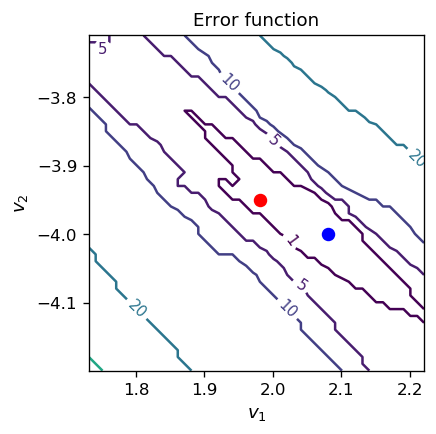

In [9]:
delta = 0.01 # grid step v1 i v2
ran=0.25 # plot range

v1 = np.arange(v1_o-ran,v1_o+ran, delta) # grid v1
v2 = np.arange(v2_o-ran,v2_o+ran, delta) # grid v2
X, Y = np.meshgrid(v1, v2) 

Z=np.array([[error(-1,-v1[i],-v2[j],samp2,func.step) 
             for i in range(len(v1))] for j in range(len(v2))]) # values of E(v1,v2) 

fig, ax = plt.subplots(figsize=(3.7,3.7),dpi=120)

CS = ax.contour(X, Y, Z, [1,5,10,20,30,40,50])
ax.clabel(CS, inline=1, fmt='%1.0f', fontsize=9)

ax.set_title('Error function', fontsize=11)
ax.set_aspect(aspect=1)
ax.set_xlabel('$v_1$', fontsize=11)
ax.set_ylabel('$v_2$', fontsize=11)

ax.scatter(v1_o, v2_o, s=50,c='red') # our found optimal point

ax.scatter(2.08, -4, s=50,c='blue'); # the true minimum

Above we can see that ...

We also note a valley, along which  the values of $ v_1 $ and $ v_2 $ giving a solution close to the true one, i.e. $ v_1 = ...$ and $ v_2 = ...$.

Generic problem of minimization, also in more dimensions

## Continuous activation function

Coming back to the contour chart above, we can see that the lines are "serrated". This is because the error function, for an obvious reason, assumes integer values. It is therefore discontinuous and non-differentiable.

In [10]:
print(Z)

[[33. 33. 30. ...  4.  4.  4.]
 [33. 30. 29. ...  4.  4.  4.]
 [30. 29. 29. ...  4.  4.  4.]
 ...
 [ 5.  5.  5. ... 30. 30. 30.]
 [ 5.  5.  6. ... 30. 30. 30.]
 [ 6.  7.  6. ... 30. 30. 30.]]


This discontinuity obviously originates from the discontinuous activation function, i.e. the step function. Having in mind the techniques we will get to know soon, it iss a good idea to use the continuous activation function. Historically, the so-called **sigmoid**

$\sigma(s)=\frac{1}{1+\exp(-s)}$

has been frequently used.

In [11]:
# sigmoid, a.k.a. the logistic function, or simply (1+arctanh(-s/2))/2 
def sig(s):
    return 1/(1+np.exp(-s))

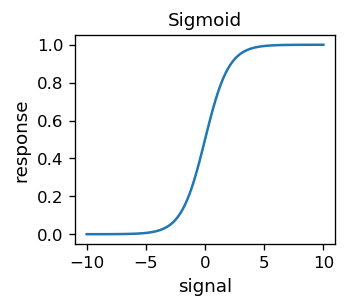

In [12]:
draw.plot(sig,start=-10,stop=10,title='Sigmoid');

This function is of course differentiable. Moreover,

$ \sigma '(s) = \sigma (s) [1- \sigma (s)] $,

which is its special feature.

In [13]:
# derivative of sigmoid
def dsig(s):
     return sig(s)*(1-sig(s))

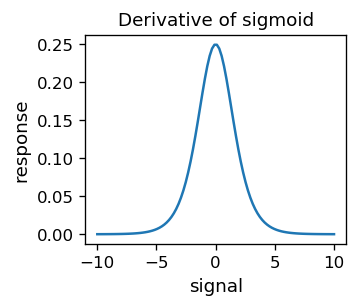

In [14]:
draw.plot(dsig,start=-10,stop=10,title='Derivative of sigmoid'); 

A sigmoid with "temperature" $ T $ is also introduced (this nomenclature is associated with similar expressions for thermodynamic functions in physics)

$\sigma(s)=\frac{1}{1+\exp(-s/T)}$.

In [15]:
# sigmoid with temperature T
def sig_T(s,T):
    return 1/(1+np.exp(-s/T))

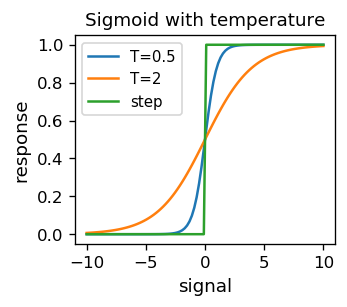

In [16]:
plt.figure(figsize=(2.8,2.3),dpi=120)

s = np.linspace(-10, 10, 100)

fs = [sig_T(z,.5) for z in s]
plt.plot(s, fs)
fs = [sig_T(z,2) for z in s]
plt.plot(s, fs)
fs = [func.step(z) for z in s]
plt.plot(s, fs)

plt.title("Sigmoid with temperature", fontsize=11)
plt.legend(('T=0.5','T=2','step'),fontsize=9)

plt.xlabel('signal',fontsize=11)
plt.ylabel('response',fontsize=11);

For smaller and smaller $ T $ the function approaches the previously used step function.

Note, however, that the argument of the sigmoid is the quotient

$ s / T = (w_0 + w_1 x_1 + w_2 x_2) / T = w_0 / T + w_1 / T \, x_1 + w_2 / T \, x_2 = v_0 + v_1 x_1 + v_2 x_2 $,

which means that we can always assume $ T = 1 $ without losing generality ($ T $ is the "scale"). However, we now have three independent arguments $ v_0 $, $ v_1 $, and $ v_2$. It is impossible to reduce the situation to two independent parameters, as was the case above.

We will now repeat our example with the classifier, but for the excitation function given by the sigmoid. We just need to replace the step function $f$ with $ \ sigma $:

Below, we see the algorithm tends to the optimum.

In [17]:
weights=[[func.rn()],[func.rn()],[func.rn()]]      # random weights from [-0.5,0.5]

print("   w0     w1    w2")   # header

for r in range(15): 
    weights=teach_perceptron(samp2,.7/(r**2+1),weights,func.sig) 
    print(np.round(weights,3)[0][0],np.round(weights,3)[1][0],np.round(weights,3)[2][0])                 

   w0     w1    w2
-7.079 -11.961 21.082
-7.132 -13.666 24.726
-6.72 -14.074 26.205
-6.582 -14.285 26.885
-6.579 -14.437 27.245
-6.621 -14.551 27.459
-6.667 -14.637 27.601
-6.703 -14.7 27.705
-6.729 -14.747 27.786
-6.747 -14.782 27.851
-6.76 -14.81 27.904
-6.771 -14.832 27.949
-6.779 -14.851 27.986
-6.785 -14.866 28.018
-6.791 -14.88 28.046


However, when using the sigmoid, we have to define the error function differently, because the answer is never "zero-one", as was the case with the step function. Typically, the sum of the squared differences between the obtained and true answers is used, i.e.

$E=\sum_p (y_o^{(p)}-y_t^{(p)})^2$.

The $ (p) $ index here means the value for a given point $ p $ from the training sample.
Note that for a step function this definition reduces to the one used previously. Because for a given point with coordinates $ (x_1 ^ {(p)}, x_2 ^ {(p)}) $

$y_o^{(p)}=\sigma(w_0+w_1 x_1^{(p)} +w_2 x_2^{(p)})$, 

we can write

$E(w_0,w_1,w_2)=\sum_p \left [\sigma(w_0+w_1 x_1^{(p)} +w_2 x_2^{(p)})-y_t^{(p)} \right]^2$.

Trick it the function does it...

In [18]:
w0_o, w1_o, w2_o = weights[0][0], weights[1][0], weights[2][0] # obtained optimum values
error(w0_o, w1_o, w2_o, samp2,func.sig) # corresponding error

7.536765211468183

The error function now has 3 arguments, so it cannot be drawn in two dimensions. We can only look at its projections, e.g. with a fixed value of $ w_0 $.

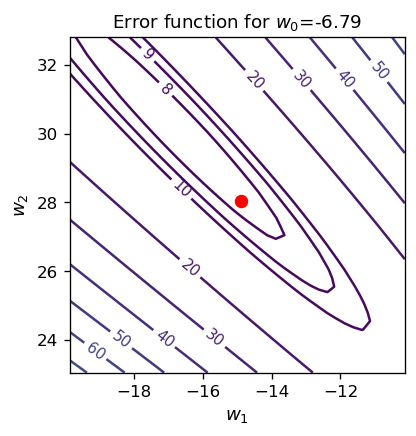

In [19]:
delta = 0.25
ran=5 
r1 = np.arange(w1_o-ran,w1_o+ran, delta) 
r2 = np.arange(w2_o-ran,w2_o+ran, delta) 
X, Y = np.meshgrid(r1, r2) 

Z=np.array([[error(w0_o,r1[i],r2[j],samp2,func.sig) 
             for i in range(len(r1))] for j in range(len(r2))])  

fig, ax = plt.subplots(figsize=(3.7,3.7),dpi=120)

CS = ax.contour(X, Y, Z,[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300])
ax.clabel(CS, inline=1, fmt='%1.0f', fontsize=9)

ax.scatter(w1_o, w2_o, s=50,c='red') # our found optimal point

ax.set_title('Error function for $w_0$='+str(np.round(w0_o,2)), fontsize=11)
ax.set_aspect(aspect=1)
ax.set_xlabel('$w_1$', fontsize=11)
ax.set_ylabel('$w_2$', fontsize=11);


## Steepest descent

Generic comment on minimization

For a differentiable function of several variables, $ F (w_1, w_2, ..., w_n) $, locally the steepest slope is defined by the minus gradient of the function $ F $, i.e. the slope is in the direction of

$-(\partial F / \partial w_1, \partial F / \partial w_2, ..., \partial F / \partial w_n) $,

where the partial derivatives are defined as the limit

$ \partial F / \partial w_1 = \ lim _ {\Delta \to 0} \frac {F (w_1 + \Delta, w_2, ..., w_n) -F (w_1, w_2, ..., w_n)} { \Delta} $

and similarly for the other $ w_i $.

The method of finding the minimum of a function by the steepest descent method is given by the iterative algorithm, where we update the position at each step with

$w_{i+1} = w_i - \epsilon  \, \partial F/\partial w_i$. 

In [20]:
w00, w10, w20= -4, -10, 30 # initial weights
w0t, w1t, w2t =[], [], []  # arrays to store the weight from iterations

Delta=0.05 # step for evaluation of gradients
epsi=0.5   # update speed

print('step  w0      w1     w2     w1/w0  w2/w0  error')

# iteraton
for i in range(10000):  # loop over rounds
    
    dw0=(error(w00+Delta, w10, w20, samp2,func.sig)-
         error(w00, w10, w20, samp2,func.sig))/Delta # gradient in w0
    dw1=(error(w00, w10+Delta, w20, samp2,func.sig)-
         error(w00, w10, w20, samp2,func.sig))/Delta # gradient in w1
    dw2=(error(w00, w10, w20+Delta, samp2,func.sig)-
         error(w00, w10, w20, samp2,func.sig))/Delta # gradient in w2
    
    w00-=epsi*dw0  # update    
    w10-=epsi*dw1 
    w20-=epsi*dw2
    
    w0t.append(w00) # store
    w1t.append(w10)
    w2t.append(w20)
    
    if(i%1000==999): # print every 1000 iterations
        print(i+1, np.round(w00,3), np.round(w10,3), np.round(w20,3),
            np.round(w10/w00,3), np.round(w20/w00,3),
            np.round(error(w00, w10, w20, samp2,func.sig),3))


step  w0      w1     w2     w1/w0  w2/w0  error
1000 -22.747 -49.106 95.438 2.159 -4.196 3.454
2000 -27.214 -55.931 108.888 2.055 -4.001 1.654
3000 -29.909 -61.326 119.505 2.05 -3.996 1.449
4000 -32.23 -65.987 128.657 2.047 -3.992 1.301
5000 -34.281 -70.122 136.76 2.045 -3.989 1.187
6000 -36.13 -73.858 144.069 2.044 -3.988 1.096
7000 -37.818 -77.28 150.754 2.043 -3.986 1.021
8000 -39.378 -80.447 156.934 2.043 -3.985 0.958
9000 -40.831 -83.403 162.694 2.043 -3.985 0.904
10000 -42.193 -86.18 168.099 2.043 -3.984 0.856


It doesn't always work perfectly!

The problems with finding the minimum of multivariable functions are well known:

- There may be local minima, and therefore it may be difficult to find the global minimum (see example above with a function with two minima).

- The minimum can be at infinity (that is, it does not exist mathematically).

- The function around the minimum can be very flat, so the gradient is very small, and the update is extremely slow.

- Numerical accuracy can be a problem.

Overall, numerical minimization of functions is an art!

In our last example we actually have a situation with minimum that "escapes" to infinity. Remember the sigmoid with temperature, whose argument is $ (w_0 + w_1 x_1 + w_2 x_2) / T $. The step function, $ T \ to 0 $, is able to accurately separate the sample points, so the system wants $ T $ to be as small as possible. Then the size of the parameters $ v_i = w_i / T $ tends to infinity. This can be seen when the above algorithm is run with a very large number of iterations.

Is such a problem bothering you? Not necessarily, if we want an approximate solution. But you have to be aware of it.

Operation of a trained network (with sigmoid) on new points

In [21]:
print(" x1  x2 answer label")

for _ in range(20):
    x1, x2=np.random.random(), np.random.random() # nowy punkt testowy
    print(round(x1,2),round(x2,2), 
          round(func.sig(w00+w10*x1+w20*x2),5),"   ", int(x2>0.25 + 0.52*x1)) 

 x1  x2 answer label
0.5 0.31 0.0     0
0.33 0.77 1.0     1
0.57 0.78 1.0     1
0.27 0.61 1.0     1
0.06 0.74 1.0     1
0.67 0.1 0.0     0
0.85 0.12 0.0     0
0.03 0.75 1.0     1
0.57 0.61 0.99999     1
0.48 0.72 1.0     1
0.24 0.28 0.0     0
0.09 0.29 0.33308     0
0.79 0.27 0.0     0
0.22 0.44 1.0     1
0.03 0.12 0.0     0
0.73 0.48 0.0     0
0.67 0.98 1.0     1
0.88 0.79 1.0     1
0.1 0.71 1.0     1
0.55 0.43 0.0     0


Escaping to infinity

**Note on derivative of our error function**

We have an error function defined as the sum over all training sample points

$B(w_0,w_1,w_2)= \sum_p [y_u^{(p)}-y_t^{(p)}]^2=\sum_p [\sigma(s^{(p)})-y_t^{(p)}]^2 $,

where

$s^{(p)}=w_0  x_0^{(p)}+w_1 x_1^{(p)} +w_2 x_2^{(p)}$,

hence 

$\partial B/\partial w_i= \sum_p 2[\sigma(s^{(p)})-y_t^{(p)}]\, \sigma'(s^{(p)}) \,x_i^{(p)} = \sum_p 2[\sigma(s^{(p)})-y_t^{(p)}]\, \sigma(s^{(p)})\, [1-\sigma(s^{(p)})] \,x_i^{(p)}$

(derivative of square function $ \times $ derivative of the sigmoid $ \times $ derivative of $ s ^ {(p)} $).

So the steepest descent method updates the weights of our neuron (using the given point $ p $ with the coordinates $ x_i $)

$w_i \to w_i - \varepsilon (y_u^{(p)} -y_t^{(p)}) y_u^{(p)} (1-y_u^{(p)}) x_i$.

Note that updating always occurs because the resulting $ y_u ^ {(p)} $ response is never 0 or 1 for the sigmoid, while
the real value of $ y_u ^ {(p)} $ is 0 or 1.

Because $ y_u ^ {(p)} (1-y_u ^ {(p)}) = \sigma (s ^ {(p)}) [1- \sigma (s ^ {(p)})] $ is nonzero only around $ y ^ {(p)} = $ 0 (see the sigmoid derivative plot earlier), thus updating only occurs near the "threshold". This is OK because the "problems" are near the dividing line.


For comparison, the earlier perceptron algorithm with the step function was structurally similar,

$w_i \to w_i - \varepsilon \,(y_u^{(p)} - y_t^{(p)}) \, x_i$,

but the updating happens here for all points (and only if there is a wrong answer), not just around the threshold.

```{admonition} Exercises
:class: warning

1) Consider a one-dimensional variant of the point classifier:

 - Generate a random sample of points on the $ x $ number line. If $ x_i> a $, where $ a $ is the dividing point (known to you), e.g. $ a = 0.5 $, assign $ x_i $ the label 1, otherwise assign 0.
 - Make graphics.
 - Take an appropriate perceptron with and train it on your sample. What approximate value for $ a $ did you find?
 - Add $ a $ to your graphics.

2) Prove (analytitically) by taking the derivative that $ \sigma '(s) = \sigma (s) [1- \sigma (s)]$. Show that the sigmoid is thw only function with this property.

3) For task 1 choose by trial and error the rate for learning $ \varepsilon $ in a best possible way. In addition, see how the accuracy varies with the size of the training sample.

```

## More conditions

Now a more complicated problem: We want a classification involving two conditions $x_,2>\frac{1}{2} + \frac{1}{2} x_1$ as before, but in addition $x_1<0.6$. How to do it?

Geometrically, we can see hat this is impossible with a single neuron, as is generates a single dividing line. 

A moment of reflection tells us that to solve our problem, one neuron should be used for the first condition, the second for the second, and their outputs should be connected in a conjunction, as we did in the first lecture. So the network will have the form

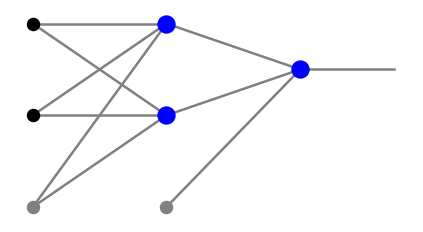

In [22]:
draw.plot_net([2,2,1]);

The weights (between input and intermediate layer, denoted by the upper $ 1 $ indicator) for the first condition are (as in the previous example)

$w_{01}^1=-\frac{1}{2}, \, w_{11}^1=-\frac{1}{2}, \, w_{21}^1=1$,

and for the second condition

$w_{01}^1=0.6, \, w_{11}^1=-1, \, w_{21}^1=0$.

The weights between the middle layer and the output (marked with the upper indicator $ 2 $) correspond to a conjunction, so we can take them as (see the first lecture)

$w_{01}^2=-1, \, w_{11}^2=0.6, \, w_{21}^2=0.6$.

In [23]:
weights={1:[[-0.5,0.6],[-0.5,-1],[1,0]], 2:[[-1],[0.6],[0.6]]}

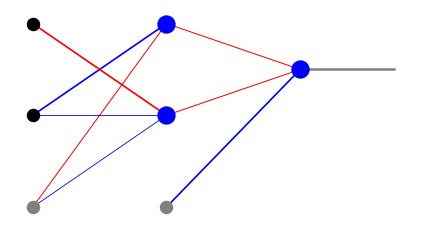

In [24]:
draw.plot_net_w([2,2,1],weights,1);

Let us see how it works:

In [25]:
x=func.feed_forward([2,2,1],weights,[0.5,.5],func.sig)

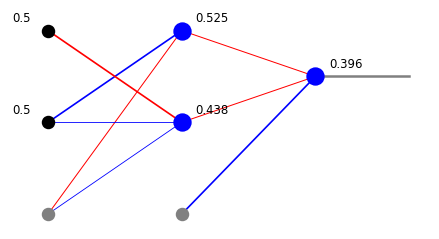

In [26]:
draw.plot_net_w_x([2,2,1],weights,1,x);

**Where we are:**

- (small) feed-forward networks, fully connected

- how to set weights such that a desire tast (classification) is performed 

- test sample = data + labels (correct answers) 

- start with some weights, e.g. random

- teach network (adjust weights) with appopriate algorithm (backprop)

- test the resuls -> happy, or improve 



## Back propagation for two neuron layers

The material below is absolutely **crucial** to understanding this very important idea of training neural networks. At the same time, it can be quite difficult for people less familiar with mathematical analysis, as there will be derivations and formulas with rich notation. However, this cannot be presented more simply than below, with the necessary accuracy.

In the example above, we knew in advance with what recipe we were generating points, so in this fortunate and rare situation, we were able to determine the weights exactly by simple reasoning. In general, this is not the case. As for the single neuron in the previous lecture, we want to train our network on the training sample. The difference is that now there are two layers (apart from the input) and two sets of weights: between the input and the middle layer and between the middle layer and the output.

The method we derive step by step here, which is the famous **back propagation algorithm (backprop)** [Arthur E. Bryson, Yu-Chi Ho, 1969] for updating the weights of a multi-layer network, uses two elements:

- **steepest descent method**, explained in the previous lecture, and
- the derivative theorem of a compolsite function **known to you from the mathematical analysis**.

Before we move on to the derivation of the algorithm, first for a network with one intermediate layer and a single neuron in the output layer (as in the example above), we must introduce the appropriate notation. We do this "programmatically", adapting a previous piece of code to print the appropriate labels.

In the figure above, the superscripts $(i)$ in $ x_ \alpha ^ {(i)} $ represent the layer number. Note that we number them from the left, starting with 0. Similarly, in a given layer, vertices starting from the bottom are numbered from 0. This is convenient, because the same convention is adopted in indexing arrays in python.
For the weights $ w _ {\alpha \beta} ^ {(i)} $ the indeces mean that
it corresponds to the edge leading from the vertex $ \alpha $ in layer $ (i-1) $ to the vertex $\beta$ in layer $i$.

According to the previously discussed MCP model, the number $ s_\beta $ entering the neuron in the $i$ layer is a weighted sum

$ s_ \beta ^ {(i)} = \sum _ {\alpha} x_ \alpha ^ {(i-1)} w _ {\alpha \beta} ^ {(i)}, ~~~~ \beta = 1, \dots $.

It is, of course, an argument to the $ \sigma $ activation function that generates the output from the neuron:

$ x_ \beta ^ {(i)} = \sigma (s_ \beta ^ {(i)}) =
 \sigma \left (\sum_ \alpha x_ \alpha ^ {(i-1)} w _ {\alpha \beta} ^ {(i)} \right), ~~~~ \beta = 1, \dots $
 
For $ \beta = 0 $ (the threshold nodes) it is different (see picture),

$ x_0 ^ {(i)} = $ 1.

Note: We are using the sigmoid here, but in general $ \sigma $ can stand for any *differentiable* activation function.


**The chain rule**

For a composite function

$[f(g(x))]' = f'(g(x)) g'(x)$,

and for more functions $[f(g(h(x)))]' = f'(g(h(x))) \,g'(h(x)) \,h'(x)$, etc. 

The following derivation is based on this "wisdom". Therefore, it is a very simple concept, and a certain complication results only from the multitude of variables and indices marking their location in the network.

### Derivative of the error function

The error function introduced earlier is the sum over the points of the training sample and equals

$E(\{w\})=\sum_p (y_o^{(p)}(\{w\})-y_t^{(p)})^2$, 

where $ \{w \} $ represent all the network weights.
We will deal with a single point contribution to $ E $, denoted as $ e $, and omit the index $ (p) $ for the sake of simplicity.
So we have the expression

$e(\{w\})= (y_o-y_t)^2$, 

and $E(\{w\})=\sum_p e(\{w\})$. Because (see the above figure) 

$y_u=\sigma(\sum_{\alpha} x_\alpha^{(1)} w_{\alpha 1}^{(2)})$ 

(the second lower index in the weights is 1, because in our current example there is only one neuron in the output layer), we can write

$e= (y_o-y_t)^2 =\left [\sigma \left(\sum_{\alpha} x_\alpha^{(1)} w_{\alpha 1}^{(2)} \right)-y_t \right]^2$.   $~~~~~~$ (*)

For the steepest descent method we need derivatives with weight. First we will deal with the derivatives with weights between the intermediate and output layer, i.e. the rightmost, marked with the upper index $ (2)$. Therefore, we differentiate the expression $ (*) $ with $ w_ {A1} ^ {(2)} $, where $ A = 0,1,2 $, using the chain rule about.
The most "outside" function is the square $ (y_o-y_t) ^ 2 $ whose derivative over $ y_o $ is $ 2 (y_o-y_t) $. Then in the composition we have the function $ \sigma (s_1 ^ {(2)}) $, whose derivative over its argument is $ \sigma'(s_1 ^ {(2)}) $, finally we have to calculate the derivative of $ s_1 ^ {(2 )} = \sum _ {\alpha} x_ \alpha ^ {(1)} w _ {\alpha 1} ^ {(2)}) $ over $ w_ {A 1} ^ {(2)})$.

In the mathematical notation we thus have

${d}/{dy_o} \, (y_o-y_t)^2 = 2 (y_u-y_t)$,

${d}/{ds_1^{(2)}} \, \sigma(s_1^{(2)}) = \sigma'(s_1^{(2)})$,

${\partial}/{\partial w_{A 1}^{(2)}} = \, \sum_{\alpha=0} x_\alpha^{(1)} w_{\alpha 1}^{(2)}) = x_A^{(1)}$

The chain rule yields

${\partial e}/{\partial w_{A1}^{(2)}}=2 (y_o-y_t) \times \sigma'(s_1^{(2)})  \times x_A^{(1)} = D_1^{(2)} x_A^{(1)},  ~~~~ A=0,\dots$.

We introduce here, for a later use,

$ D_1^{(2)}=2 (y_o-y_t) \sigma'(s_1^{(2)})$.

To compute derivatives over the weights between the input and the intermediate layers, we rewrite $ (*) $ inserting

$x_\alpha^{(1)}=\sigma \left (\sum_{\beta} x_\beta^{(0)} w_{\beta \alpha}^{(1)} \right ), ~~~~~ \alpha=1,2,\dots$,

$x_0^{(1)}=1$,

which gives

$e= \left [ \sigma \left (\sum_{\alpha=1} \sigma\left \{\sum_{\beta=0} x_\beta^{(0)} w_{\beta \alpha}^{(1)}\right\} w_{\alpha 1}^{(2)} + x_0^{(1)} w_{0 1}^{(2)} \right)-y_t \right]^2$. 

Calculating the successive derivatives as above (there is now one more because there is one more function in the composition) and multiplying them, we get

${\partial e}/{\partial w_{BA}^{(1)}}=2 (y_u-y_t)\times \sigma'(s_1^{(2)}) \times  w_{A1}^{(2)} \sigma'(s_A^{(1)}) \times x_B^{(0)} = D_1^{(2)} w_{A1}^{(2)} \sigma'(s_A^{(1)}) x_B^{(0)} = 
D_A^{(1)} x_B^{(0)}$, 

where

$D_A^{(1)}= D_1^{(2)} w_{A1}^{(2)} \sigma'(s_A^{(1)})$.

At this point, we have a complete set of formulas to write a recipe for updating all weights in the steepest decline method in our network:

$------------$

$ w_{A1}^{(2)} \to w_{A1}^{(2)} -\varepsilon D_1^{(2)} x_A^{(1)},$

$  w_{BA}^{(1)} \to  w_{BA}^{(1)} -\varepsilon D_A^{(1)} x_B^{(0)}.$

$------------$


Because for the sigmoid $\sigma'(s)=\sigma(s)[1-\sigma(s)]$, we can also write 


$ D_1^{(2)}=2 (y_u-y_t)\, y_u(1-y_u)$,

$D_A^{(1)}= D_1^{(2)} w_{A1}^{(2)}\, x_A^{(1)}(1-x_A^{(1)})$.

**Comment**

Before we proceed to the application of the derived method by example, we will make an important observation.
Updating the weights on the edges leading to the last layer, $ w_ {A1} ^ {(2)} $, requires knowing what is "happening" on the output ($ (y_o-y_t) $ in $ D_1 ^ {(2) } $), on the edges leading to the output layer
(derivative of the signal $ \sigma '(s_1 ^ {(2)}) $), and in the intermediate layer (signals coming from neurons, $ x_A ^ {(1)} $). However, it does not depend on what happens in the input layer and the weight values at the edges leading from the input layer to the intermediate layer. So we can compute $ D_1 ^ {(2)} $ first and update
weights $ w_ {A1} ^ {(2)} $ no matter what happens in the layers to the left. Hence **backprop**!

## Implementation in  Python

First, a reminder of the forward signal propagation function. Now we define it with a sigmoid, and this is the only difference from the previous definition.

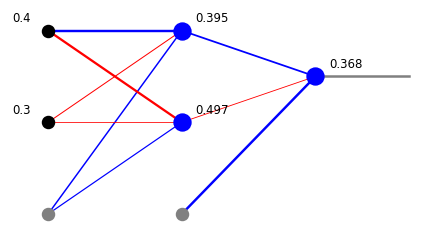

In [27]:
# architecture
arch=[2,2,1]

# initial random weights
weights=func.set_ran_w(arch)

# forward propagation                                     
x=func.feed_forward([2,2,1],weights,[.3,.4],func.sig)
draw.plot_net_w_x([2,2,1],weights,3,x);

In [28]:
x[2][0]

0.3675387554113678

Note that when using sigmoid, the output is a real number in the range (0,1).

And now the code in which we enter the formulas from our derivation step by step:

Repeating the execution of the above cell, we see that the weights change slightly.

In [81]:
def poi():
    x1=np.random.random()
    x2=np.random.random()
    if (x2>0.1+x1/2 and x1<0.6): return [x1,x2,1]
    else: return  [x1,x2,0]

In [82]:
sample=[poi() for _ in range(200)]

{1: array([[1.5245748 , 1.64040501],
        [0.81918405, 0.89658979],
        [1.0682591 , 0.93992013]]),
 2: array([[3.96571676, 3.65764698],
        [2.84565807, 3.09341864],
        [2.93852225, 3.07418036]]),
 3: array([[-0.20113984],
        [ 0.14540419],
        [ 0.0445645 ]])}

In [83]:
def back_prop_2(sample, p, weights, eps):
    """
    sample - labeled data in the format [x1,x2,label]
    p - index of the used data point
    weights - dictionary of weights
    eps - learning
    """
 
    po=[sample[p][0],sample[p][1]] 
    x=func.feed_forward([2,2,1],weights,po,func.sig) # running throught the network
    
    yt=sample[p][2] # label of the data (true answer)
    yo=x[2][0]      # obtained answer

    s12=np.dot(x[1],weights[2])[0] # formulas derived above
    D12=2*(yo-yt)*dsig(s12)
    
    for A in [0,1,2]:
        weights[2][A]-=eps*D12*x[1][A] # update of weights (2)
    
    sA1=np.dot(x[0], weights[1])
    DA1=[D12*weights[2][A+1][0]*dsig(sA1)[A] for A in range(2)]

    for B in [0,1,2]:
        for A in [0,1]:
            weights[1][B][A]-=eps*DA1[A]*x[0][B] # update of weights (1)

Teaching the network on the training sample

In [84]:
# initial random weights
weights=func.set_ran_w(arch)

# initial learning speed
eps=.7

In [85]:
for k in range(3000):  # rounds
    eps=.9995*eps      # decrease learning speed slightly in each round

    if k%100==99: print(k+1,' ',end='') # print progress
    for p in range(len(sample)):
        back_prop_2(sample,p,weights,eps) 

100  200  300  400  500  600  700  800  900  1000  1100  1200  1300  1400  1500  1600  1700  1800  1900  2000  2100  2200  2300  2400  2500  2600  2700  2800  2900  3000  

Check on a test sample

In [87]:
test=[] # test sample

for k in range(10000):
    po=[np.random.random(),np.random.random()]  # random point on a square
    xt=func.feed_forward([2,2,1],weights,po,func.sig)    
    test.append([po[0],po[1],np.round(xt[2][0],5)]) 

tt=np.array(test) 

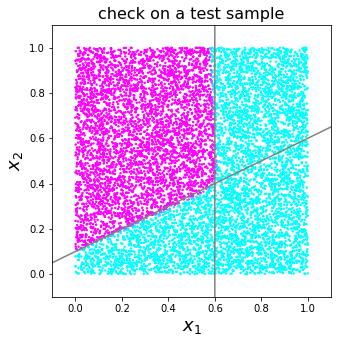

In [94]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=2,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

lin=draw.l2(0.1,0.5,-1)
plt.plot(lin[0],lin[1],c='gray')

lin2=draw.l2(0.6,-1,0.00001)
plt.plot(lin2[0],lin2[1],c='gray')

plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11);

**We can train our network more if the result is unsatisfactory** by adding more round on top of the current result (it takes several hundred rounds on a training sample of 3000)

Weights obtained from teaching are different every time! So there are local minima corrsponding to each such set of weights for which the network works similarly.

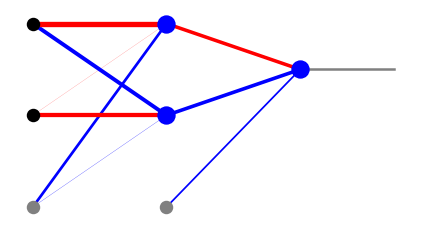

In [38]:
draw.plot_net_w([2,2,1],weights,0.1);

There are some important observations:

- teaching takes a long time, but using it is a blink of an eye,

- the network works inaccurately for the points near the boundary lines, it can be trained more for improvement,

- too long training does not actually make sense, because the accuracy stops improving,

- the weight values, in our example, increase with learning, i.e. they are trying to "run away to infinity". Could be scaled down during the algorithm.

Moreover, our solutions, which give roughly the same performance, are every time (for different initial random weights) **different!** There are therefore many minima of this 9-dimensional function (there are so many weights) leading to a similar network operation. The local minima are therefore by no means an obstacle to the use of the backprop algorithm. This is an important practical feature.

- there are (many) local mimina, but it does not matter - any of them works fine,




There are more sophisticated methods of finding the minimum of a function, based on the steepest descent method presented here, or quite different. They allow a (local) minimum to be reached more efficiently. We will not go into these quite technical details in this lecture.

HOMEWORK

Consider a perceptron with one intermediate layer classifying points in a triangle, square, generally some *convex* polygon in a plane.

- How many neurons are needed in the intermediate layer?

- Construct an "analytical" network for a triangle or a square, choosing the appropriate weights. For example, a triangle can be defined as a conjunction of three conditions: $ x_1 + x_2 <1.2 $, $ x_1> 0.2 $, $ x_2> 0.2 $ (the parameters may of course be different).

- Create a test sample and draw it as a scattered plot by marking the points inside and outside the triangle with different colors.

- Modify carefullly the code for the back propagation (pay attention to the issue of index ranges, which depend on the number of neurons).

- Teach the network on the training sample.

- Check the operation on a test sample. Make a plot for the test sample. Draw lines to define the polygon.

- Comment on the results.

## Any number of layers

We will now move on to formulating the back propagation algorithm for a perceptron with any number of $k$ intermediate layers and any number of $ n $ neurons in the output layer. This generalization is conceptually very simple and is based on the same reasoning as in the previous lecture for a perceptron with one intermediate layer and one neuron in the output layer. On the other hand, the notation becomes quite complicated, which can make the material seem difficult.

The error function for one point from the training sample is now the sum over all neurons in the output layer, numbered with the index $\gamma=1,2,\dots,n$:

$e(\{w\})= \sum_{\gamma=1}^n(y_{o,\gamma}-y_{t,\gamma})^2$,

where

$y_{o,\gamma}=\sigma(\sum_{\alpha=0} x_\alpha^{(k)} w_{\alpha \gamma}^{(k+1)}), ~~~~~ \gamma=1,2,\dots,n$.

For neuron $\alpha$ in layer $j=1,2,\dots,k$ the input sygnal is

$s_\alpha^{(j)}=\sum_{\beta=0} x_\beta^{(j-1)}w_{\beta \alpha}^{(j)},  ~~~~ \alpha=1,2,\dots$,

and the output signal is

$x_\alpha^{(j)}=\sigma \left ( s_\alpha^{(j)}\right ), ~~~~~ \alpha=1,2,\dots$,

$x_0^{(j)}=1$.

Subsequent substitutions in the $e$ are as follows:

$e= \sum_{\gamma} (y_{o,\gamma}-y_{t,\gamma})^2 \\ =
\sum_{\gamma} \left( \sigma \left (\sum_{\alpha_k=0} x_{\alpha_k}^{(k)} w_{\alpha_k \gamma}^{(k+1)} \right )-y_{t,\gamma} \right)^2 \\=
\sum_{\gamma} \left( 
\sigma \left (\sum_{\alpha_k=1} \sigma\left( \sum_{\alpha_{k-1}=0} x_{\alpha_{k-1}}^{(k-1)} w_{\alpha_{k-1} \alpha_k}^{(k)}\right) w_{\alpha_k \gamma}^{(2)} + x_0^{(k)} w_{0 \gamma}^{(k+1)} \right)-y_{t,\gamma} \right)^2\\=
\sum_{\gamma} \left( 
\sigma \left (\sum_{\alpha_k=1}  \sigma\left( 
\sum_{\alpha_{k-1}=1} \sigma\left( \sum_{\alpha_{k-2}=0} x_{\alpha_{k-2}}^{(k-2)} w_{\alpha_{k-2} \alpha_{k-1}}^{(k-1)}\right) w_{\alpha_{k-1} \alpha_k}^{(k)} + 
x_{0}^{(k-1)} w_{0 \alpha_k}^{(k)}
 \right)  w_{\alpha_k \gamma}^{(2)} + x_0^{(k)} w_{0 \gamma}^{(k+1)} \right)-y_{t,\gamma} \right)^2 \\= \dots
$

The neuron indices in layer $j$ are $\alpha_j$. By calculating successive derivatives by weights, going backwards, i.e. from the end to the beginning of the network (here you have to struggle a bit to notice the repeating regularity), and using the steepest descent method for updating the weights, we get the following recipe:


$  w_{B A}^{(j)} \to   w_{B A}^{(j)} -\varepsilon D_{A}^{(j)} x_{B}^{(j-1)},~~~ j=1,\dots,k+1,$ 

where, recursively, 

$ D_{\gamma}^{(k+1)}=2 (y_{o,\gamma}-y_{t,\gamma})\, \sigma'(s_\gamma^{(k+1)}), \\
D_A^{(k)}= \sum_C D_C^{(k+1)}\, w_{AC}^{(k+1)} \,\sigma'(s_A^{(k)}), \\
D_A^{(k-1)}= \sum_C D_C^{(k)}\, w_{AC}^{(k)} \,\sigma'(s_A^{(k-1)}), \\
\dots \\
D_A^{(1)}= \sum_C D_C^{(2)}\, w_{AC}^{(2)} \,\sigma'(s_A^{(1)}),$

which may be written more compactly as

$ D_{\gamma}^{(k+1)}=2 (y_{o,\gamma}-y_{t,\gamma})\, \sigma'(s_\gamma^{(k+1)}), \\
D_A^{(j)}= \sum_C D_C^{(j+1)}\, w_{AC}^{(j+1)} \,\sigma'(s_A^{(j)}), ~~~~ j=k,k-1,\dots,1.$

Moreober, for the sigmoid we can use

$\sigma'(s_A^{(i)})=x_A^{(i)}(1-x_A^{(i)})$.

The above formulas show with full clarity the **back propagation** for updating the weights, because we start from the last layer and then we go back recursively to the beginning of the network. At each step, we need only the signal going out from the given layer and the properties of the next layer! This magic is a feature of 
1) feed-forward network, and 
2) the chain rule.


**Summary for those who do not like derivations**

We have a method that works as follows:

1. We generate (obtain, buy) a training sample (data with classification feature = labels).

2. We determine somehow the initial weights (hyperparameters) of the network, e.g. randomly, and set the initial learning speed.

3. We train the network on a training sample, iteratively improving the weights. We use the backprop algorithm. We reduce the learning speed as we proceed according to some policy (nohing strict here, just experience).

4. We test the trained network on a test sample.

5. If the test is unsatisfactory, repeat from 3. We can modify "technical" parameters, such as the learning speed.

### Code for backprop for networks with any number of layers

Now we will create a code that implements our algorithm for networks with any number of layers and any number of neurons in the output layer. The previous one was for a single intermediate layer and one output neuron. It is simpy a programmatic implementation of the formulas derived above. In the code, we try to keep the notation from the derivation as far as possible.

First, as a reminder, our sample network that will be used for testing:

... and the previously generated training sample (points on the plane limited by two lines)

For future generality **(new convention)**, we split the sample into an array of data "da" and labels "la":

In [101]:
features=np.delete(sample,2,1)
labels=np.delete(np.delete(sample,0,1),0,1)

And now the code (it has 14 lines, not counting the comments!)

In [103]:
def back_prop(fe,la, p, arch, weights, eps):
    """
    fe - array of features
    la - array of labels
    p - index of the used data point
    arch - array of numbers of nodes in subsequent layers
    weights - disctionary of weights
    eps - learning speed 
    """
 
    l=len(arch) # number of layers
    
    x=func.feed_forward(arch,weights,fe[p],func.sig) # feed-forward of point p
   
    n=arch[l-1]  
    k=len(arch)-2  
    
    # formulas from the derivation
    
    D={}                 
    D.update({k+1: [2*(x[k+1][gam-1]-la[p])*
                    func.dsig(np.dot(x[k],weights[k+1]))[gam-1] for gam in range(1,n+1)]})   
    weights[k+1]-=eps*np.outer(x[k],D[k+1]) 
    
    for j in reversed(range(1,k+1)):           
        u=np.delete(np.dot(weights[j+1],D[j+1]),0) 
        v=func.dsig(np.dot(x[j-1],weights[j]))          
        D.update({j: [u[i]*v[i] for i in range(len(u))]}) 
        weights[j]-=eps*np.outer(x[j-1],D[j])      

Teaching with the new code

In [109]:
weights=func.set_ran_w(arch)
eps=.7

In [110]:
for k in range(3000):  # 3000 rounds
    eps=.9995*eps # each round eps is decreased 
    if k%100==99:
        print(k+1,' ',end='')
    for p in range(len(sample)): 
        back_prop(features,labels,p,arch,weights,eps)

100  200  300  400  500  600  700  800  900  1000  1100  1200  1300  1400  1500  1600  1700  1800  1900  2000  2100  2200  2300  2400  2500  2600  2700  2800  2900  3000  

In [111]:
eps # final learning speed

0.1561325318938138

**Run on the test sample**

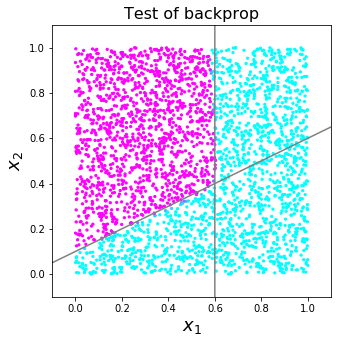

In [113]:
test=[] # test sample

for k in range(3000):
    po=[np.random.random(),np.random.random()]  # nowy punkt testowy
    xt=func.feed_forward(arch,weights,po,func.sig)    # generowanie wyniku dla tego punktu
    test.append([po[0],po[1],np.round(xt[2][0],4)]) # zapis do tablicy

tt=np.array(test)   

plt.figure(figsize=(5,5))
plt.title("Test of backprop",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))


lin=draw.l2(0.1,0.5,-1)
plt.plot(lin[0],lin[1],c='gray')

lin2=draw.l2(0.6,-1,0.00001)
plt.plot(lin2[0],lin2[1],c='gray')


plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

**Learning on a network with more neurons (why not?)**

In [114]:
net=[2,3,1]
weights=func.set_ran_w(net)
eps=.7

for k in range(300):  # rounds
    eps=.995*eps
    if k%100==99:
        print(k+1,' ',end='')
    for _ in range(1):
        for p in range(len(sample)):
            back_prop(features,labels,p,net,weights,eps)

100  200  300  

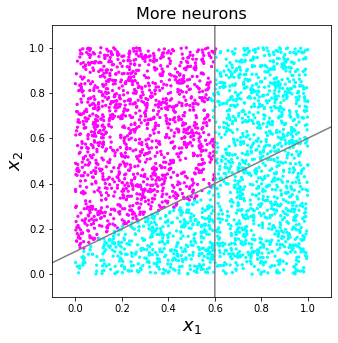

In [116]:
test=[] 

for k in range(3000):
    po=[np.random.random(),np.random.random()] 
    xt=func.feed_forward(net,weights,po,func.sig)    
    test.append([po[0],po[1],np.round(xt[2][0],0)]) 

tt=np.array(test)   

plt.figure(figsize=(5,5))
plt.title("More neurons",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

lin=draw.l2(0.1,0.5,-1)
plt.plot(lin[0],lin[1],c='gray')

lin2=draw.l2(0.6,-1,0.00001)
plt.plot(lin2[0],lin2[1],c='gray')

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

**Learning on a deeper network**

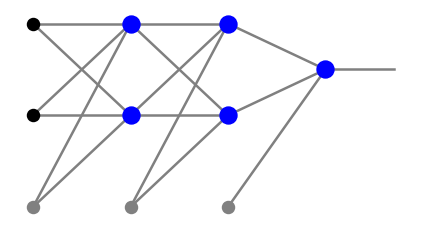

In [117]:
net=[2,2,2,1]
draw.plot_net(net);

In [145]:
weights=func.set_ran_w(net,3.)
eps=.7

for k in range(1000):  # rounds
    eps=.999*eps
    if k%100==99:
        print(k+1,' ',end='')
    for p in range(len(features)):
        back_prop(features,labels,p,net,weights,eps)

100  200  300  400  500  600  700  800  900  1000  

In [146]:
eps

0.25738679733967446

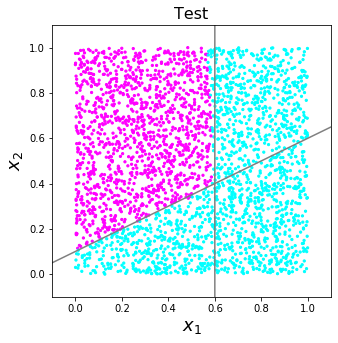

In [148]:
test=[]

for k in range(3000):
    po=[np.random.random(),np.random.random()]  
    xt=func.feed_forward(net,weights,po,func.sig)    
    test.append([po[0],po[1],np.round(xt[3][0],0)])

tt=np.array(test)   

plt.figure(figsize=(5,5))
plt.title("Test",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))


lin=draw.l2(0.1,0.5,-1)
plt.plot(lin[0],lin[1],c='gray')

lin2=draw.l2(0.6,-1,0.00001)
plt.plot(lin2[0],lin2[1],c='gray')


plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

**Comments**

- It works

- No need to have more neurons or layers

## Points inside a circle


In [155]:
def cir():
    x1=np.random.random() # coordinate 1
    x2=np.random.random() # coordinate 2
    if((x1-0.5)**2+(x2-0.5)**2 < 0.4*0.4): # inside the circle of radius 0.4
                                            # centered at (0.5,0.5)
        return np.array([x1,x2,1])
    else:                                              # outside
        return np.array([x1,x2,0])


In [156]:
# 3000 points 
sample_c=np.array([cir() for _ in range(3000)]) # sample
feature_cs=np.delete(sample_c,2,1)
labels_c=np.delete(np.delete(sample_c,0,1),0,1)

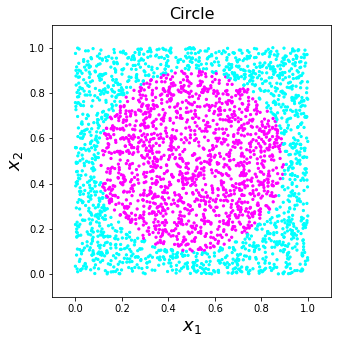

In [157]:
plt.figure(figsize=(5,5))
plt.title("Circle",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(sample_k[:,0],sample_k[:,1],c=sample_k[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

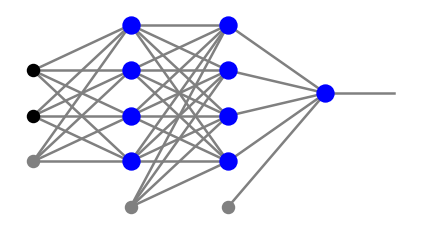

In [158]:
net=[2,4,4,1]
draw.plot_net(net);

In [159]:
weights=func.set_ran_w(net,5.) # scaled random initial weights
eps=.7 # initial learning speed 

In [161]:
for k in range(500):  # rounds
    eps=.995*eps
    if k%100==99:
        print(k+1,' ',end='')
    for p in range(len(features)):
        back_prop(features,labels,p,net,weights,eps)

100  200  300  400  500  

In [162]:
eps

0.004657778005182377

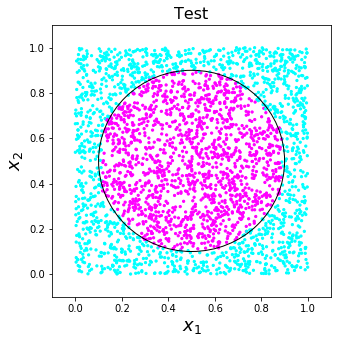

In [164]:
test=[] 

for k in range(3000):
    po=[np.random.random(),np.random.random()] 
    xt=func.feed_forward(net,weights,po,func.sig)   
    test.append([po[0],po[1],np.round(xt[3][0],0)])

tt=np.array(test)

fig=plt.figure(figsize=(5,5))

# drawing the circle
ax=fig.add_subplot(1,1,1)
circ=plt.Circle((0.5,0.5), radius=.4, color='black', fill=False)
ax.add_patch(circ)

plt.title("Test",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

**Comment:** It is fascinating that we have taught the network to recognize if a point is in a circle, and it has no concept of geometry, Euclidean distance, equation of the cirle, etc. The network just learned "empirically" all this.

If the network has a lot of neurons and connections, little signal flows from each synapse and the network is therefore resistant to small random damage. This is what happens in the brain, which is constantly "damaged" (cosmic rays, alcohol, ...). Besides, such a network after destruction can be (already with a smaller number of connections) re-trained.

**Homework/projects:**

Modify the lecture wheel example by replacing the figure into

- semicircle
- two circles
- ring
- any of your favorite figures

Experiment with the number of layers and neurons, but remember that a large number of them increases the computation time and does not necessarily improve the result.